In [1]:
from Helper_modules import denoiser, helper_func, import_img, noise, evaluator
import os
import numpy as np

In [2]:
base_dir = os.getcwd()  # Current working directory

# Set the Import image and convert it to numpy array and normalize it

In [3]:
image_path = f"{base_dir}/Dataset/train/002_img.png"
image = import_img.load_and_normalize_image(image_path)

# Initialize differnt type of Noises and plot them

In [4]:
salt_und_pepper_noisy_image = noise.add_salt_and_pepper_noise(image, salt_prob=0.008, pepper_prob=0.008)
gaussian_noisy_image = noise.add_gaussian_noise(salt_und_pepper_noisy_image, sigma=0.15)
poisson_noisy_image = noise.add_poisson_noise(image, lam = 100)
speckle_noisy_image = noise.add_speckle_noise(image)

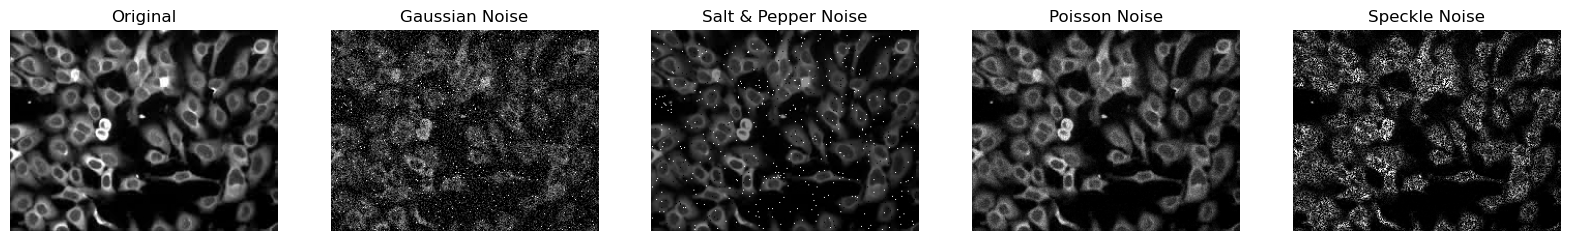

In [5]:
helper_func.plot_noisy_images(image, gaussian_noisy_image, salt_und_pepper_noisy_image, poisson_noisy_image, speckle_noisy_image)

# Set the noise type nad select the noise

In [6]:
noisy_image = gaussian_noisy_image
noise_type = "Gaussian_Noise"

# Evaluator of all denoiser to find the best hyperparameters

In [7]:
denoiser = denoiser.ImageDenoiser(image, noisy_image=noisy_image)
evaluator = evaluator.DenoisingEvaluator(image, noisy_image)

# Gaussian

In [8]:
# Example usage for Gaussian Denoising
gaussian_param_grid = {
    'd': [3, 5, 7, 9, 11],
    'sigmaX': list(np.linspace(0.1,20,50))
}
gaussian_denoise_func = lambda d, sigmaX: denoiser.denoise_with_gaussian_blur(kernel_size=(d, d), sigmaX=sigmaX)
# Run Gaussian denoising evaluation
best_gaussian_psnr, best_gaussian_params = evaluator.evaluate_denoising(gaussian_denoise_func, gaussian_param_grid, 'numbers/gaussian_psnr_results.csv', 'Gaussian')
denoised_gaussian = gaussian_denoise_func(**best_gaussian_params)

# Bilateral

In [9]:
# Example usage for Bilateral Filter Denoising
bilateral_param_grid = {
    'd': [3, 5, 7, 9, 11],
    'sigma_color': [25, 50, 75, 100, 125],
    'sigma_space': [25, 50, 75, 100, 125]
}
bilateral_denoise_func = lambda d, sigma_color, sigma_space: denoiser.denoise_with_bilateral_filter(
    d=d, sigma_color=sigma_color, sigma_space=sigma_space
)
# Run Bilateral filter evaluation
best_bilateral_psnr, best_bilateral_params = evaluator.evaluate_denoising(bilateral_denoise_func, bilateral_param_grid, 'numbers/bilateral_psnr_results.csv', 'Bilateral')


# NLM

In [10]:
# Example usage for Non-Local Means Denoising
nlm_param_grid = {
    'h': list(range(1, 100)),
}
nlm_denoise_func = lambda h: denoiser.denoise_with_nonlocal_means(h=h)
# Run Non-Local Means filter evaluation
best_nlm_psnr, best_nlm_params = evaluator.evaluate_denoising(
    nlm_denoise_func, nlm_param_grid, 'numbers/nlm_psnr_results.csv', 'Nonlocal Means')


# Median Filter

In [11]:
median_param_grid = {
    'size': [3, 5, 7, 9, 11]
}
median_denoise_func = lambda size: denoiser.denoise_with_median_filter(size=size)
# Run Median Filter denoising evaluation
best_median_psnr, best_median_params = evaluator.evaluate_denoising(median_denoise_func, median_param_grid, 'numbers/median_psnr_results.csv', 'Median')
denoised_median = median_denoise_func(**best_median_params)

<div class="alert alert-block alert-warning">
**Note:** Iterative
</div>

# Bergman TV

In [12]:
# Example usage for TV Bregman Denoising
tv_bregman_param_grid = {
    'weight': [0.1, 0.15, 0.2, 0.25],
    'max_iter': [100, 150, 200, 250]
}
tv_bregman_denoise_func = lambda weight, max_iter: denoiser.denoise_with_tv_bregman(weight=weight, max_iter=max_iter)
# Run TV Bregman denoising evaluation
best_tv_bregman_psnr, best_tv_bregman_params = evaluator.evaluate_denoising(tv_bregman_denoise_func, tv_bregman_param_grid, 'numbers/tv_bregman_psnr_results.csv', 'TV_Bregman')
denoised_tv_bregman = tv_bregman_denoise_func(**best_tv_bregman_params)

# TV Chambolle

In [13]:
# Example usage for TV Chambolle Denoising
tv_chambolle_param_grid = {
    'weight': [0.05, 0.1, 0.15, 0.2],
    'eps': [1e-4, 1e-3, 1e-2, 1e-1],
    'max_iter': [100, 150, 200, 250]
}
tv_chambolle_denoise_func = lambda weight, eps, max_iter: denoiser.denoise_with_tv_chambolle(img= denoised_median,weight=weight, epsilon=eps, max_num_iter=max_iter)
# Run TV Chambolle denoising evaluation
best_tv_chambolle_psnr, best_tv_chambolle_params = evaluator.evaluate_denoising(tv_chambolle_denoise_func, tv_chambolle_param_grid, 'numbers/tv_chambolle_psnr_results.csv', 'TV_Chambolle')
denoised_tv_chambolle = tv_chambolle_denoise_func(**best_tv_chambolle_params)

# Plot all the results (Denoised Images and correspondent PSNRs)

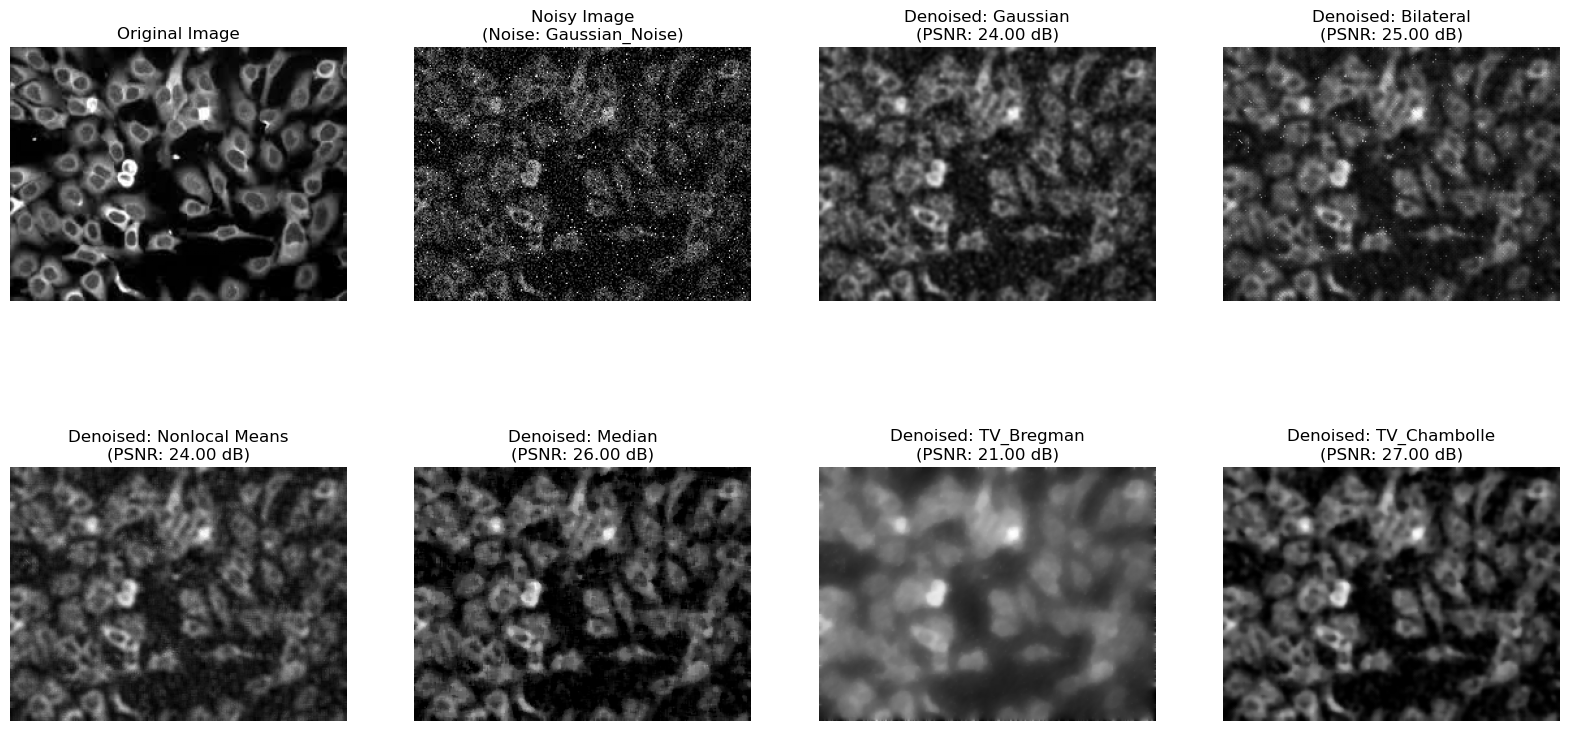

In [14]:
helper_func.plot_all_denoised(original=image, noisy=noisy_image, all_denoised=evaluator.all_denoised, 
                              method_names=evaluator.method_names, psnrs=evaluator.all_psnrs, noise_type=noise_type)